<a href="https://colab.research.google.com/github/naashonomics/pandas_templates/blob/master/pandasai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to PandasAI**
PandasAI is a Python library that makes it easy to ask questions to your data in natural language.

Beyond querying, PandasAI offers functionalities to visualize data through graphs, cleanse datasets by addressing missing values, and enhance data quality through feature generation, making it a comprehensive tool for data scientists and analysts.

**Features**


*   **Natural language querying:** Ask questions to your data in natural language.
*   **Data visualization:** Generate graphs and charts to visualize your data.
*   **Data cleansing:** Cleanse datasets by addressing missing values.
*   **Feature generation:** Enhance data quality through feature generation
*   .**Data connectors:** Connect to various data sources like CSV, XLSX, PostgreSQL, MySQL, BigQuery, Databrick, Snowflake, etc.


 **How does PandasAI work?**
PandasAI uses a generative AI model to understand and interpret natural language queries and translate them into python code and SQL queries. It then uses the code to interact with the data and return the results to the user.

**Who should use PandasAI?**
PandasAI is designed for data scientists, analysts, and engineers who want to interact with their data in a more natural way. It is particularly useful for those who are not familiar with SQL or Python or who want to save time and effort when working with data. It is also useful for those who are familiar with SQL and Python, as it allows them to ask questions to their data without having to write any complex code.


Using the library
📦 Installation
You can install the PandasAI library using pip
pip install pandasai pandas

What we will cover  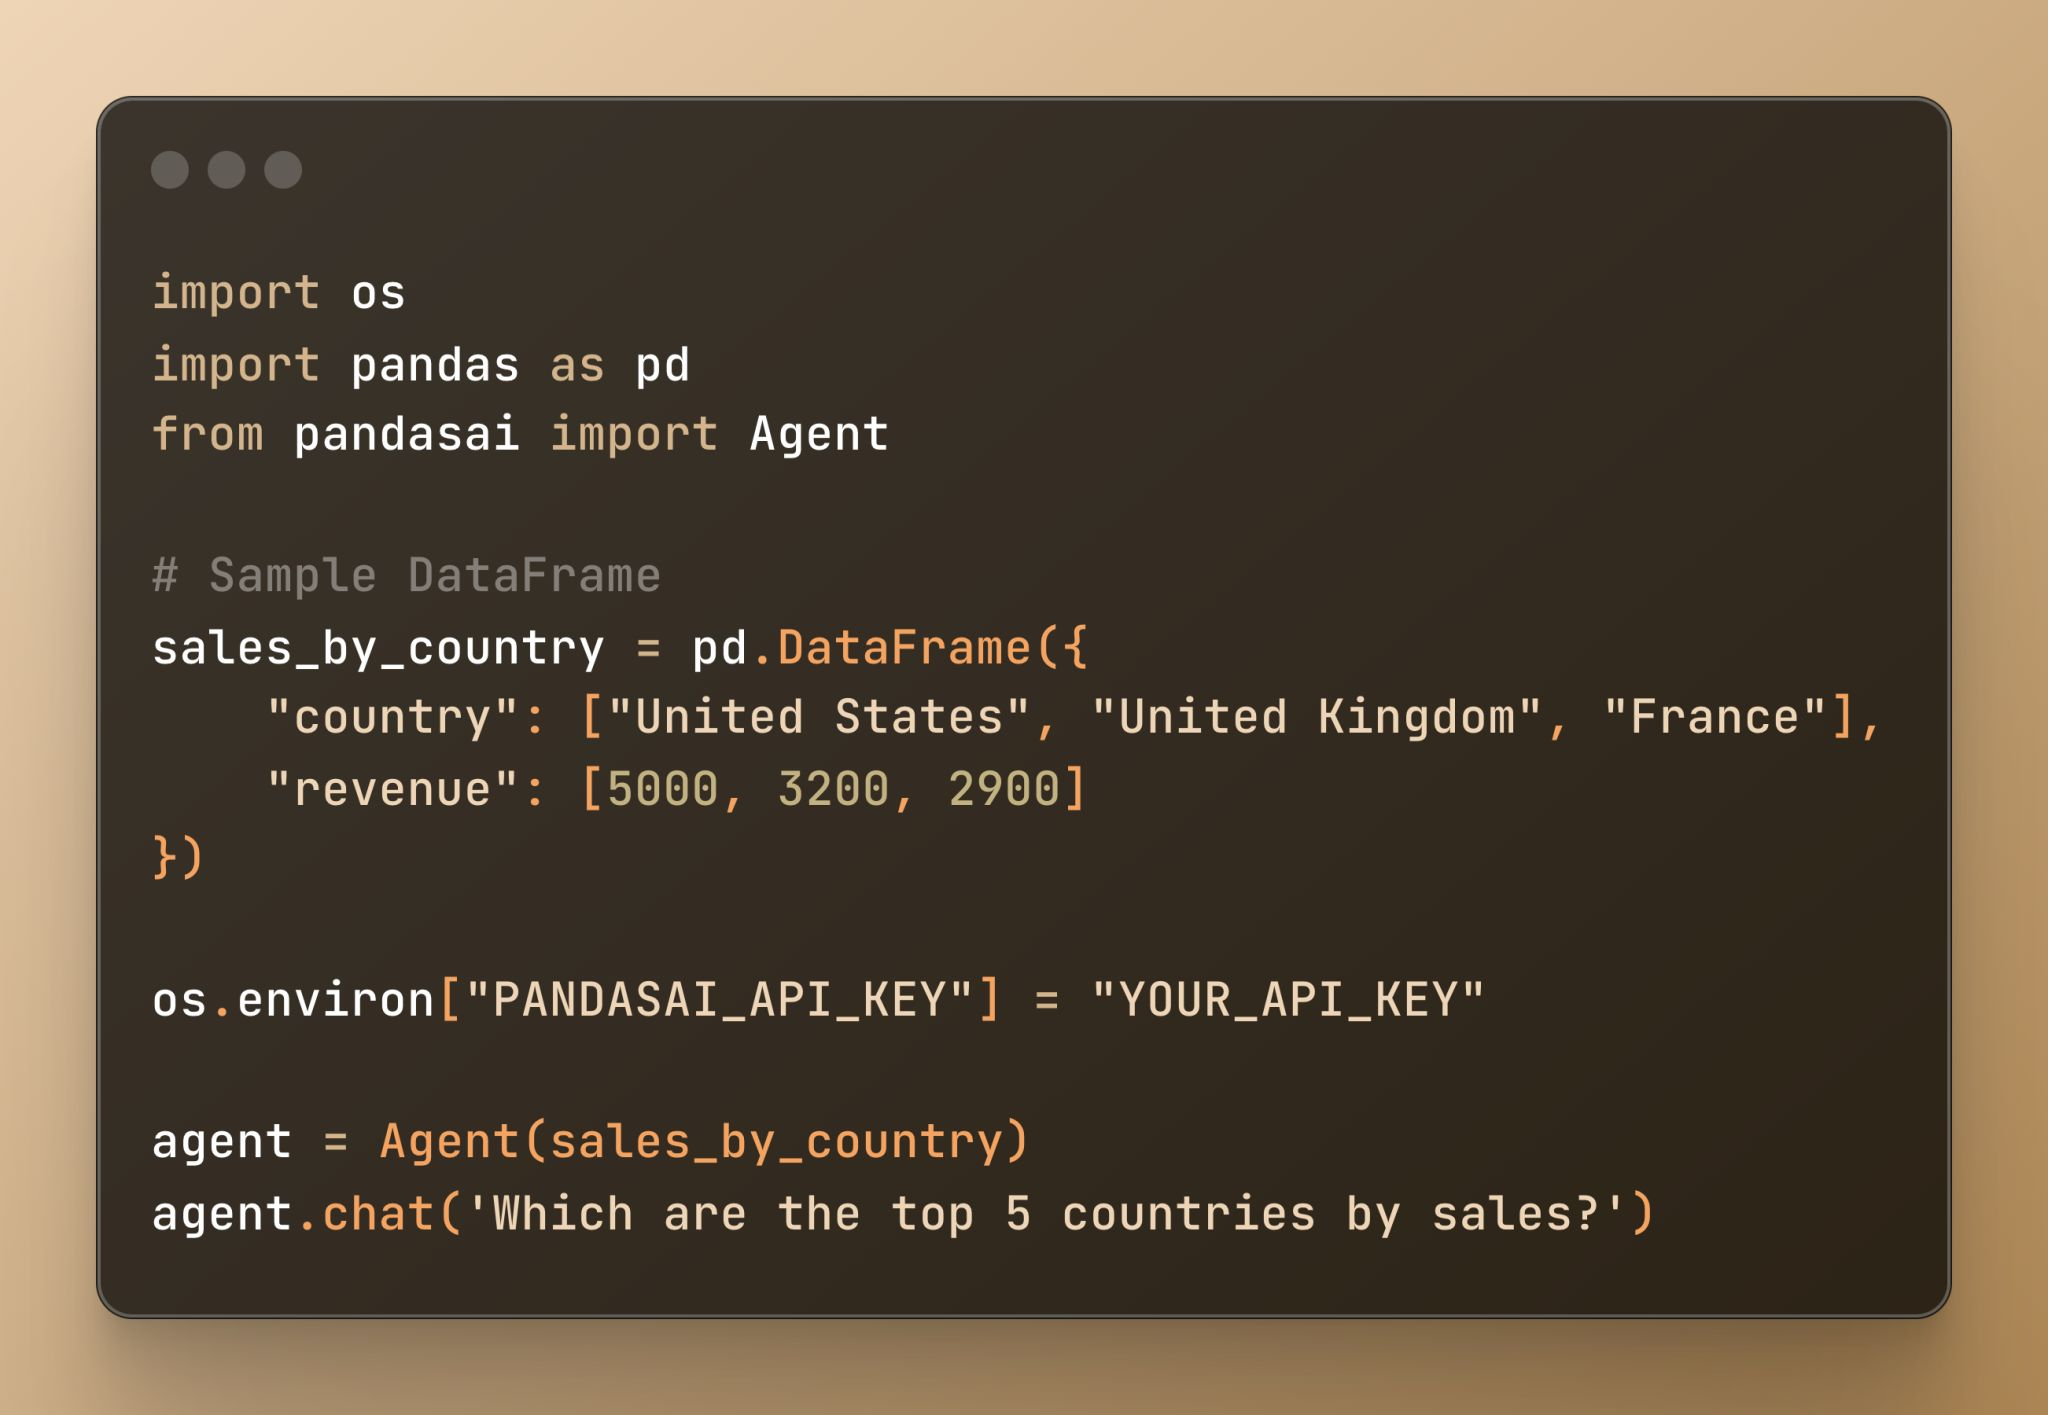

In [2]:
!pip install pandasai pandas

In [13]:
from google.colab import userdata
api_key = userdata.get('MY_PANDAS_API_KEY')  # Use the exact name of your secret

import os
import pandas as pd
from pandasai import Agent


# Sample DataFrame
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "revenue": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
os.environ["PANDASAI_API_KEY"] = api_key

In [14]:
agent = Agent(sales_by_country)
agent.chat('Which are the top 4 countries by sales?')

'The top 4 countries by sales are: China, United States, Japan, Germany'

In [15]:
agent.chat('Which are the top 2 countries by sales in descending order?')

'The top 2 countries by sales in descending order are: China, United States.'

**Visualize charts**
You can also ask PandasAI to generate charts for you:

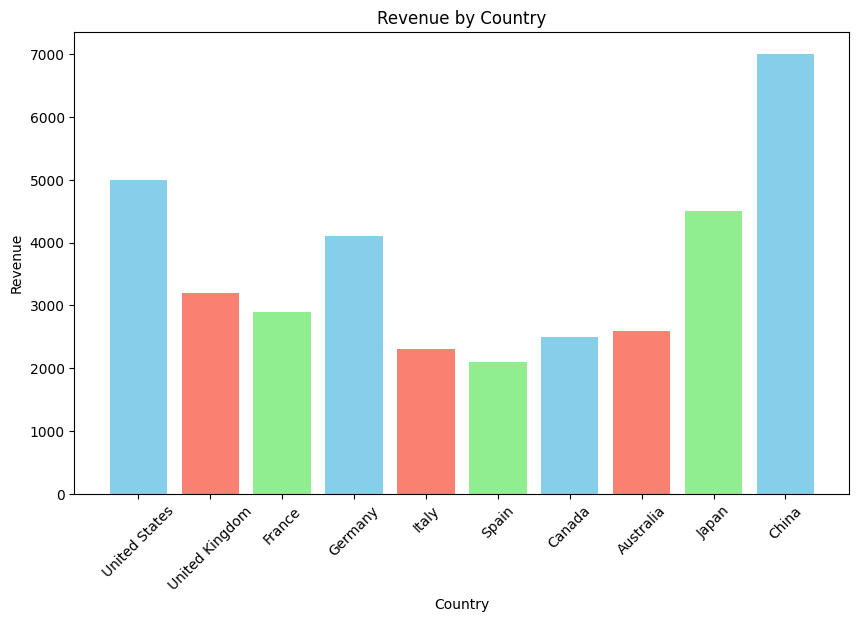

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [18]:
agent.chat('Plot the histogram of countries showing for each one the gdp. Use different colors for each bar and have text visisble on x asis ')

**Multiple Dataframes**

In [19]:
employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'Marketing', 'Finance']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

In [20]:
agent = Agent([employees_df, salaries_df])
agent.chat("Who gets paid the most?")

'The employee who gets paid the most is Olivia from Marketing department with a salary of $7000.'

In [21]:
agent.chat("Who gets paid the least?")

'The employee who gets paid the least is Liam from IT department with a salary of $4500.'

In [24]:
agent.chat("Who gets paid the same salary with thier peers?")

,EmployeeID,Name,Department,Salary
